In [1]:
import pandas as pd

In [2]:
genres=pd.read_csv("ml-100k/u.genre",sep="|",index_col=1,header=-1)
occups=pd.read_csv("ml-100k/u.occupation",sep="|",header=-1,encoding="latin-1")
print(occups)
genres


                0
0   administrator
1          artist
2          doctor
3        educator
4        engineer
5   entertainment
6       executive
7      healthcare
8       homemaker
9          lawyer
10      librarian
11      marketing
12           none
13          other
14     programmer
15        retired
16       salesman
17      scientist
18        student
19     technician
20         writer


,0
1,
0,unknown
1,Action
2,Adventure
3,Animation
4,Children's
5,Comedy
6,Crime
7,Documentary
8,Drama


In [3]:
users=pd.read_csv("ml-100k/u.user",sep="|",header=-1,index_col=0)
len(users)

943

In [4]:
cols=["name","date","?","link"]
cols.extend(list(genres[0]))
cols

['name',
 'date',
 '?',
 'link',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [5]:
cols
items=pd.read_csv("ml-100k/u.item",sep="|",header=-1,index_col=0,encoding="latin-1", names=cols)
len(items)
items

,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
train1=pd.read_csv("ml-100k/u1.base",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )
train1.head()

#import sys
#sys.getsizeof(train1)
train1.rating.unique()

array([5, 3, 4, 1, 2])

In [48]:
df=train1

In [80]:
import scipy.sparse
import numpy as np
avg=df.rating.mean()
print(avg)
#these are the ratings
user_item=scipy.sparse.coo_matrix((np.array(df["rating"]-avg),(np.array(df["user"]-1),np.array(df["item"]-1))))
#these are if there is a rating
#user_item_n=scipy.sparse.coo_matrix((np.ones(len(df)),(np.array(df["user"]-1),np.array(df["item"]-1))))
print(user_item.count_nonzero())
#print(user_item_n.count_nonzero())
print(user_item.shape)
#print(user_item_n.shape)
avg_rat_item=np.array(user_item.mean(axis=1))[:,0]
#avg_rat_item.shape
#best_items=avg_rat_item.argsort()
#best_items
items.iloc[avg_rat_item.argsort()].name



3.52835
80000
(943, 1682)


405                           Mission: Impossible (1996)
181                            Return of the Jedi (1983)
655                                   Stand by Me (1986)
774                                 Prophecy, The (1995)
537                          My Own Private Idaho (1991)
653                                 Touch of Evil (1958)
660                          Fried Green Tomatoes (1991)
896                          Sweet Hereafter, The (1997)
445                            Body Snatcher, The (1945)
561                   Mary Shelley's Frankenstein (1994)
782                                 Little Odessa (1994)
933                                  Funeral, The (1996)
843                               Shaggy Dog, The (1959)
727                              Immortal Beloved (1994)
682               I Know What You Did Last Summer (1997)
399                         Three Musketeers, The (1993)
13                               Mighty Aphrodite (1995)
833                            

In [11]:
user_user=(user_item.dot(user_item.T)).toarray()
item_item=(user_item.T.dot(user_item)).toarray()
#user_user_n=(user_item_n.dot(user_item_n.T)).toarray()
#item_item_n=(user_item_n.T.dot(user_item_n)).toarray()

In [12]:
item_item_row_max=np.sqrt(item_item.max(axis=0))
item_item_norm=np.nan_to_num(item_item/item_item_row_max[:,np.newaxis]/item_item_row_max[np.newaxis,:])
user_user_row_max=np.sqrt(user_user.max(axis=0))
user_user_norm=np.nan_to_num(user_user/user_user_row_max[:,np.newaxis]/user_user_row_max[np.newaxis,:])


/home/baruselli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


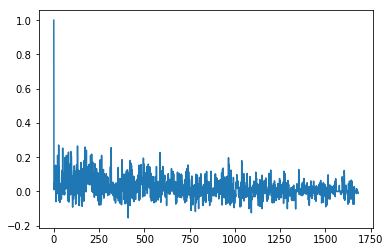

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(item_item_norm[0])

In [ ]:
#from datetime import datetime
#datetime.fromtimestamp(train1.time[0])

In [47]:
sorting=item_item[0].argsort()[-10:]
items.iloc[sorting]

,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
28,Apollo 13 (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Apollo%2013%2...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
132,"Wizard of Oz, The (1939)",01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?Wizard%20of%2...,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
98,"Silence of the Lambs, The (1991)",01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Silence%20of%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
172,"Empire Strikes Back, The (1980)",01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
318,Schindler's List (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
174,Raiders of the Lost Ark (1981),01-Jan-1981,NaN,http://us.imdb.com/M/title-exact?Raiders%20of%...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
